## Building a CNN using Keras for MNIST Dataset
### Created by Ugur Uresin

##### Note: This workbook is prepared by using 'Udacity Deep Learning Nanodegree Program Content' for personal use only.
##### Do NOT copy, share and publish!

In [1]:
## Load MNIST Database
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


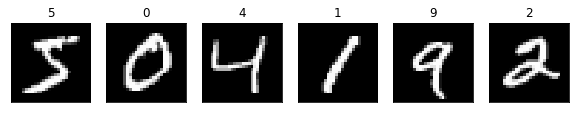

In [2]:
## Visualize the first six training images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize = (10,10))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [3]:
## Rescaling the images: [0,255] ---> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
## Encode categorical integer labels using an one-hot scheme
from keras.utils import np_utils

# print first 10 (integer-valued)training labels
print('Integer-values labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-values labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### The CNN Structure

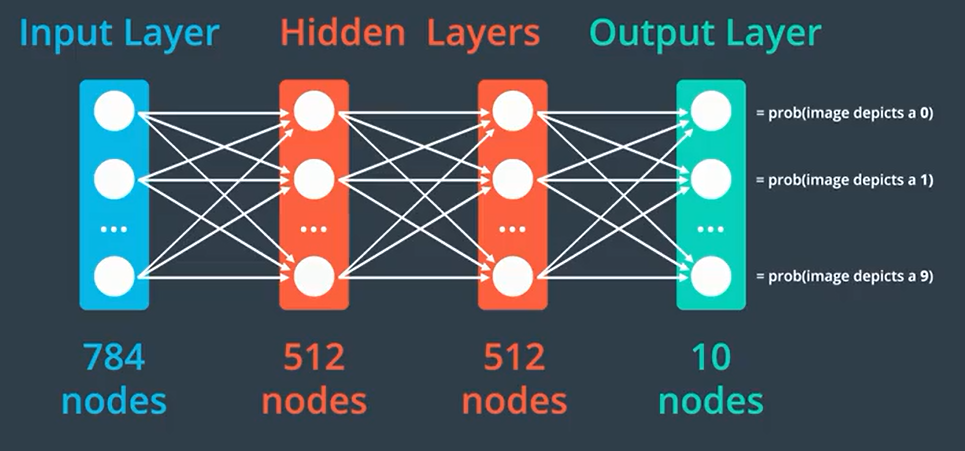

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512))
model.add(Dense(512))
model.add(Dense(10, activation='softmax'))

# summarize model
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.layers import Dropout

'''dropout layers:
    start small dropout value
    and see how NN response!'''

# define the model
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Entropy-Loss
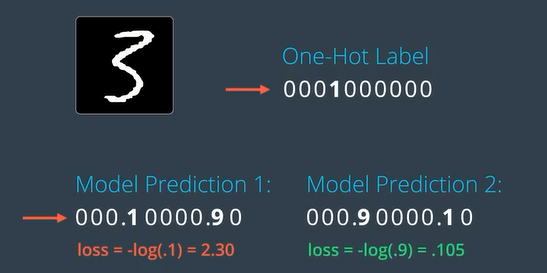

### Gradient-Descent Optimizers
(Here rmsprop is preferred):

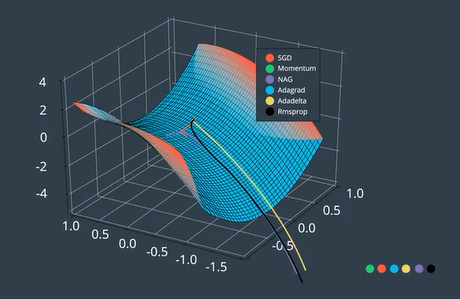

In [14]:
# compile the model
model.compile(loss ='categorical_crossentropy',
              optimizer ='rmsprop',
              metrics =['accuracy'])

In [15]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 10.7800%


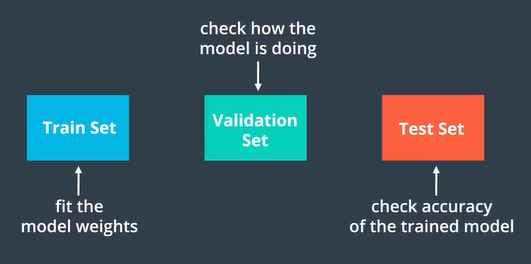

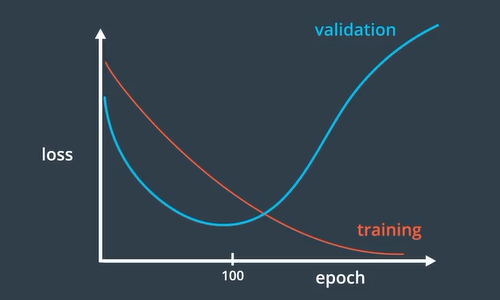

In [16]:
## Train the Model

from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                              verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
                validation_split=0.2, callbacks=[checkpointer],
                verbose=1, shuffle=True)

###Parameters:
#validation_split=0.2: 20% of training set ---> validation set
#filepath: where we'd like to save the 'weights'

###verbose:
#By setting verbose 0, 1 or 2 you just say
#how do you want to 'see' the training progress for each epoch.
#verbose=0 will show you nothing (silent)
#verbose=1 will show you an animated progress bar
#verbose=2 will just mention the number of epoch like this: Epoch 1/10

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.2772 - acc: 0.9146 - val_loss: 0.1246 - val_acc: 0.9624

Epoch 00001: val_loss improved from inf to 0.12464, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 7s 152us/step - loss: 0.1106 - acc: 0.9660 - val_loss: 0.1202 - val_acc: 0.9602 ETA: 0s - loss: 0.1108 - acc: 0.966

Epoch 00002: val_loss improved from 0.12464 to 0.12021, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.0800 - acc: 0.9753 - val_loss: 0.0913 - val_acc: 0.9736

Epoch 00003: val_loss improved from 0.12021 to 0.09135, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.0629 - acc: 0.9810 - val_loss: 0.0858 - v

In [22]:
## load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [25]:
## evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy:
print('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 97.9200%


### CNN Intuition

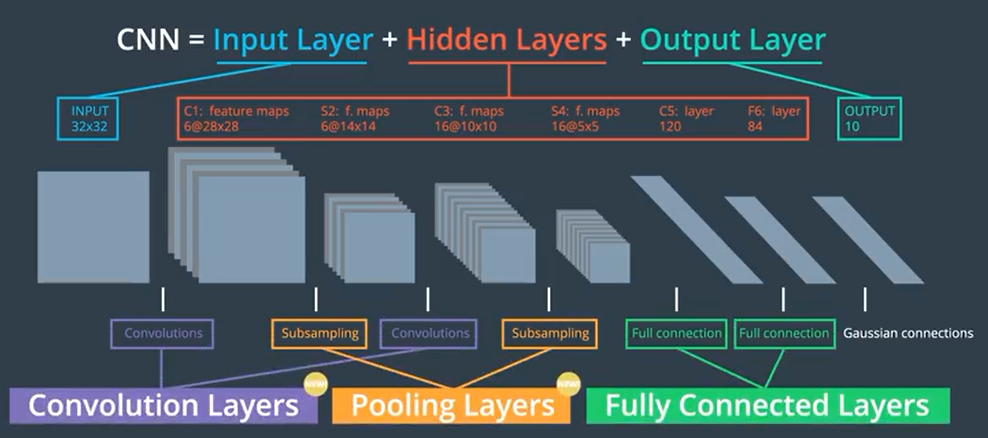

### Convolution
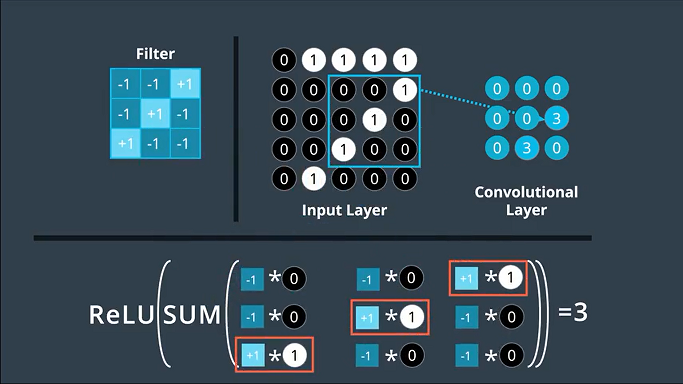

### Filters

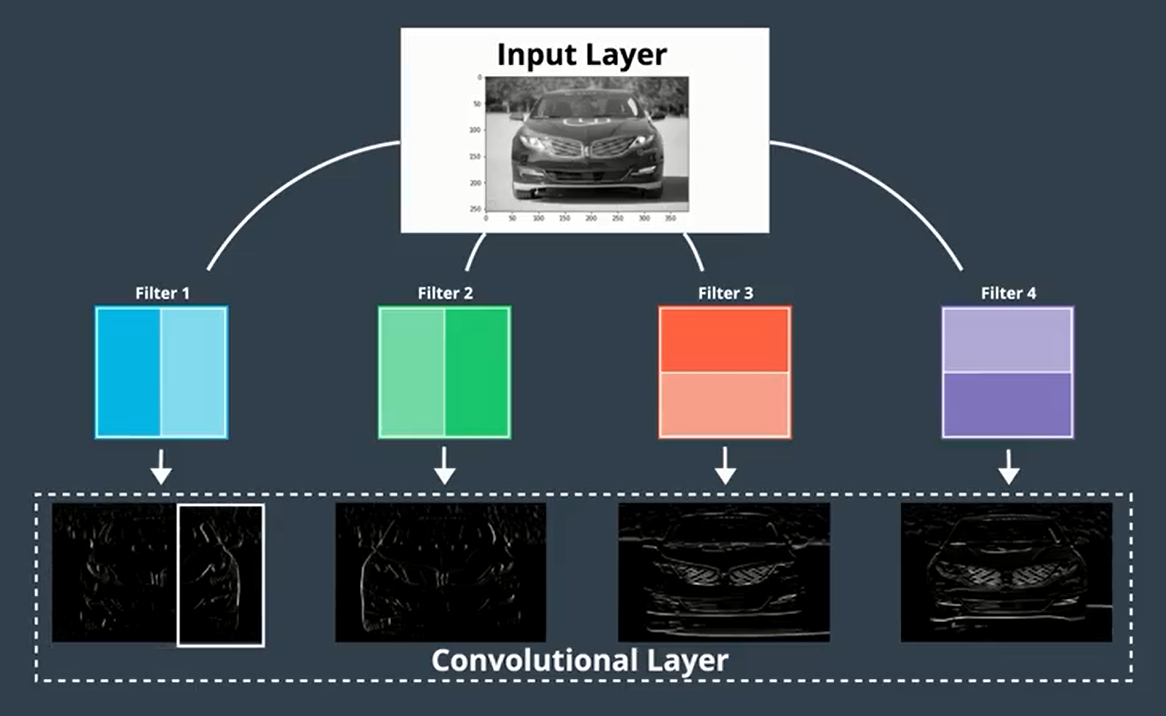

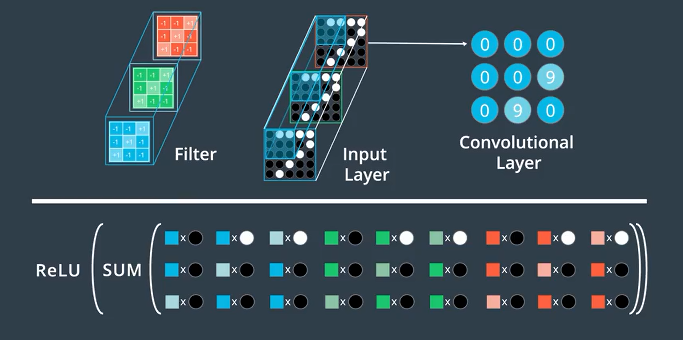

### Pooling Layers: 'Max Pooling'
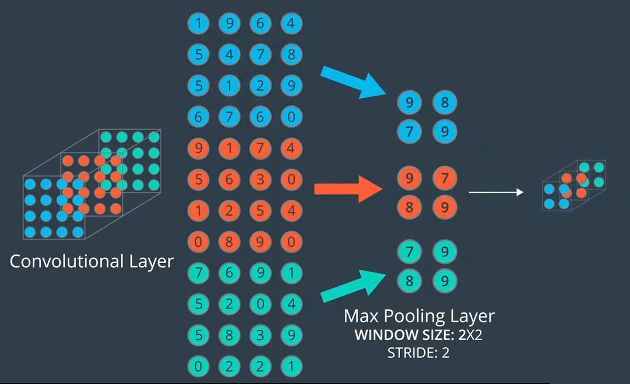

### Pooling Layers: 'Global Average Pooling'

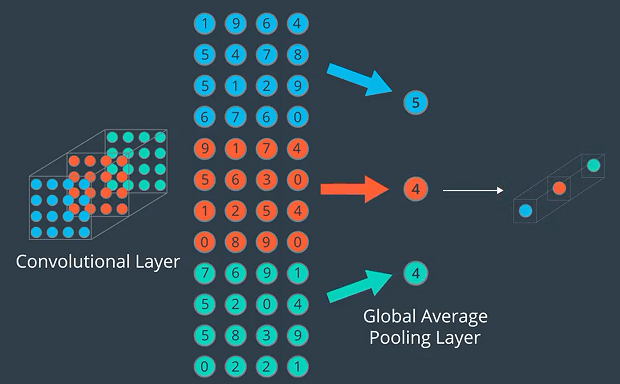

### Building The Model & Parameters:

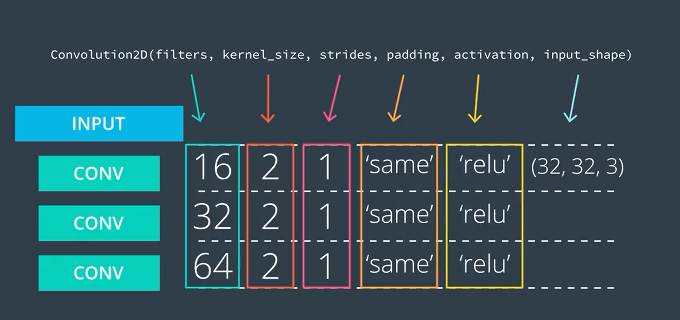

In [30]:
from keras.models import Sequential
from keras.layers import Convolution2D

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(32,32,3)))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        8256      
Total params: 10,544
Trainable params: 10,544
Non-trainable params: 0
_________________________________________________________________


### Pooling: Decrase the spatial dimensions & increase the depth!

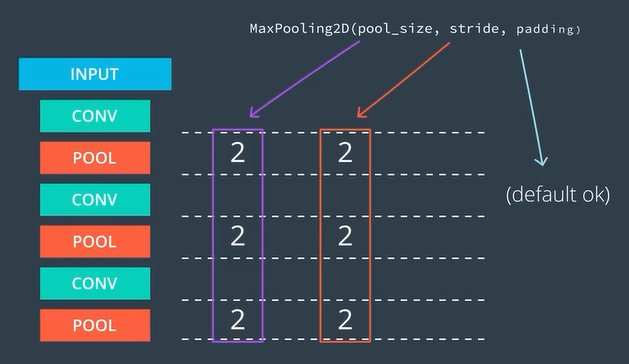

In [31]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 10,544
Trainable params: 10,544
Non-trainable params: 0
_________________________________________________________________


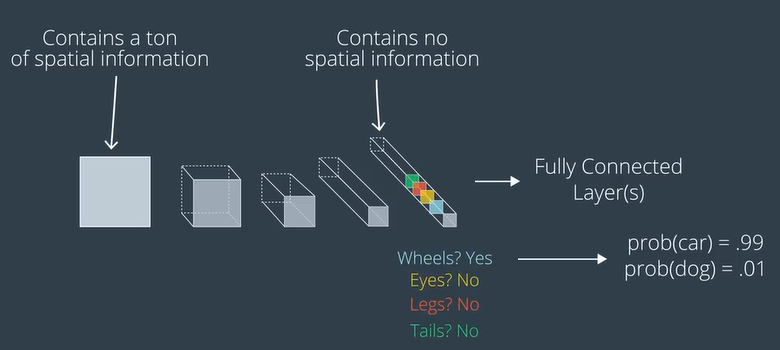

In [32]:
## Final Achitecture
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax')) #10 classes! (0...9), softmax for probabilities!

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
__________

In [1]:
## END OF THE TRAINING ##